<a href="https://colab.research.google.com/github/AJ-0504/SpamOrHamDetection/blob/initial-code/spam_or_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer#convert text data into numerical values or feature vector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection and Preprocessing

In [22]:
df=pd.read_csv("/content/mail_data.csv")#data loaded of rawMailData

In [23]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
6448     spam            get vouchers for free in the given link
6449     spam  congratulations on winning the lottery click t...
6450     spam  Your credits have been topped up for http://ww...
6451     spam  your credit card has been blocked click on the...
6452     spam  your bills are due and connection will be cut ...

[6453 rows x 2 columns]


In [24]:
#replace the num values with a null string
mailData=df.where((pd.notnull(df)),"") #null values get replace with empty string ""

In [25]:
mailData.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
category_counts = mailData['Category'].value_counts()

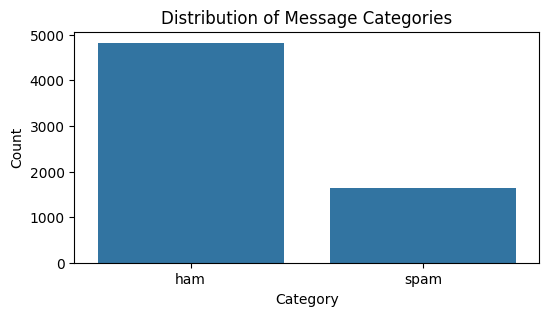

In [27]:
#Plot the distribution of categories
plt.figure(figsize=(6, 3))
sns.countplot(x='Category', data=mailData)
plt.title('Distribution of Message Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

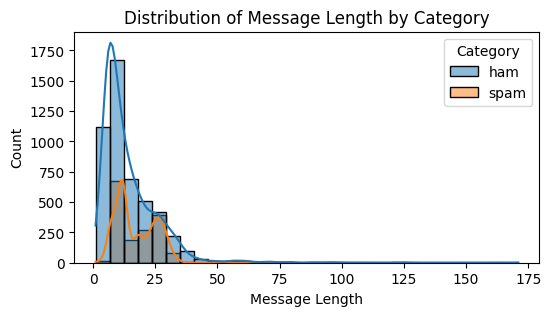

In [28]:
#Word count distribution for messages
mailData['message_length'] = mailData['Message'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6, 3))
sns.histplot(data=mailData, x='message_length', hue='Category', bins=30, kde=True)
plt.title('Distribution of Message Length by Category')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

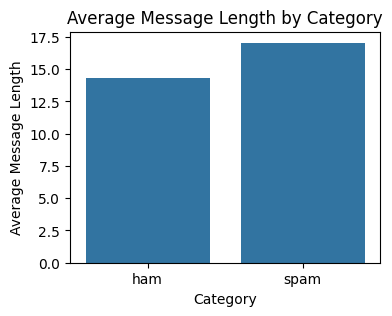

In [29]:
# Average message length for each category
avg_length_by_category = mailData.groupby('Category')['message_length'].mean()
plt.figure(figsize=(4, 3))
sns.barplot(x=avg_length_by_category.index, y=avg_length_by_category.values)
plt.title('Average Message Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Message Length')
plt.show()



In [30]:
mailData.shape#total rows and columns

(6453, 3)

In [31]:
#spam=0;ham=1
mailData.loc[mailData["Category"]=='spam','Category',] = 0
mailData.loc[mailData["Category"]=='ham','Category',] = 1

Spam=0
Ham=1

In [32]:
mailData.head()

,Category,Message,message_length
0,1,"Go until jurong point, crazy.. Available only ...",20
1,1,Ok lar... Joking wif u oni...,6
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,1,U dun say so early hor... U c already then say...,11
4,1,"Nah I don't think he goes to usf, he lives aro...",13


In [33]:
X=mailData['Message']
Y=mailData['Category']

In [34]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
6448              get vouchers for free in the given link
6449    congratulations on winning the lottery click t...
6450    Your credits have been topped up for http://ww...
6451    your credit card has been blocked click on the...
6452    your bills are due and connection will be cut ...
Name: Message, Length: 6453, dtype: object


In [35]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
6448    0
6449    0
6450    0
6451    0
6452    0
Name: Category, Length: 6453, dtype: object


## Train Test Splitting

In [36]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=3)

In [37]:
print(X.shape)
print(x_test.shape)
print(x_train.shape)

(6453,)
(1291,)
(5162,)


## Feature Extraction

In [38]:
#transforming text data to feature vectors that can be used as input to the Logistic Regression
feature_extraction=TfidfVectorizer(min_df = 1,stop_words='english',lowercase=True)

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)
#converting object data of y to integer
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [39]:
print(x_train_features)#x train in numerical form

  (0, 2893)	0.17065451898369613
  (0, 2991)	0.35372161243744893
  (0, 7225)	0.23963814558465055
  (0, 1549)	0.36004477236910265
  (0, 3600)	0.36004477236910265
  (0, 4000)	0.20550348724168935
  (0, 798)	0.4001671718713782
  (0, 1334)	0.41936730657290416
  (0, 2249)	0.23654878775133237
  (0, 3185)	0.30802179059984897
  (1, 1719)	0.31512291357344685
  (1, 843)	0.3597503447898352
  (1, 3824)	0.2779016827236604
  (1, 3143)	0.31512291357344685
  (1, 4308)	0.21960619795378242
  (1, 1270)	0.33159357060995215
  (1, 5080)	0.3088610603865591
  (1, 7352)	0.30343679643006904
  (1, 6838)	0.2662155655802826
  (1, 6117)	0.3597503447898352
  (1, 3506)	0.2209166870357592
  (2, 6768)	0.4405905975644386
  (2, 3919)	0.3778073340192466
  (2, 1868)	0.33771787850736656
  (2, 5075)	0.4856873830142803
  :	:
  (5159, 5716)	0.33358889460407515
  (5159, 4498)	0.25423540594187677
  (5159, 6160)	0.2352927540701108
  (5159, 6991)	0.20086390580430105
  (5160, 149)	0.293981484112151
  (5160, 650)	0.30224362947923195
 

# Training the Model

## logistic Regression

In [40]:
model=LogisticRegression()#loading logistric Regression model

In [41]:
#training the logistic regression model with the training data
model.fit(x_train_features,y_train)

LogisticRegression()

Evaluating the trained model

In [42]:
#prediction on training data
prediction_on_training_data=model.predict(x_train_features)
accuracy_on_training_data=accuracy_score(y_train,prediction_on_training_data)

In [43]:
print("Accuracy on training data: ",accuracy_on_training_data)

Accuracy on training data:  0.9742347927160016


In [44]:
prediction_on_testing_data=model.predict(x_test_features)
accuracy_on_testing_data=accuracy_score(y_test,prediction_on_testing_data)

In [45]:
print("Accuracy on testing data: ",accuracy_on_testing_data)

Accuracy on testing data:  0.9697908597986057


## Building a predictive system

In [46]:
input_mail=[input("Enter email message: ")]

#converting text to feature vectors
input_data_features=feature_extraction.transform(input_mail) #string to integers

#making predictions
prediction=model.predict(input_data_features)


if(prediction[0]==1):
  print("ham")
else:
  print("spam")

Enter email message: you have won the lottery!!
spam


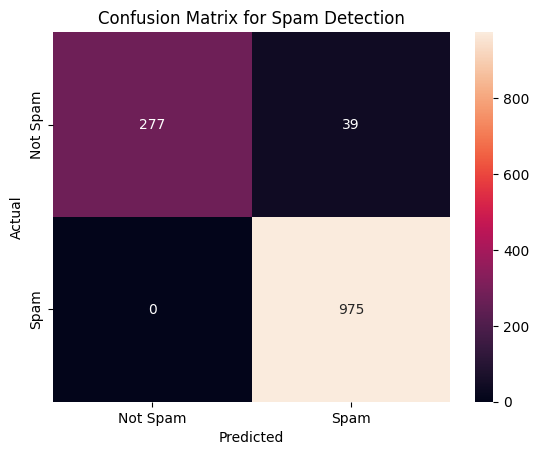

In [47]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
confusion_matrix = confusion_matrix(y_test, prediction_on_testing_data)

# Plot confusion matrix with labels and title
sns.heatmap(confusion_matrix, annot=True, fmt="d", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Spam Detection")
plt.show()


In [48]:
# prompt: calculate precision of the model

from sklearn.metrics import precision_score

# Calculate precision score
precision = precision_score(y_test, prediction_on_testing_data)

# Print the precision score
print("Precision of the model:", precision)


Precision of the model: 0.9615384615384616


In [49]:
# prompt: calculate recall

from sklearn.metrics import recall_score

# Calculate recall score
recall = recall_score(y_test, prediction_on_testing_data)

# Print the recall score
print("Recall of the model:", recall)


Recall of the model: 1.0


In [50]:
# prompt: calculate f1-measure

# Calculate F1-measure
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the F1-measure
print("F1-measure of the model:", f1_score)


F1-measure of the model: 0.9803921568627451


In [51]:
# prompt: calculate false positivity rate,false negativity rate,Negative predictivity value,false discovery rate and matthew's correlation coefficient

# Calculate false positivity rate
fpr = confusion_matrix[0][1] / (confusion_matrix[0][1] + confusion_matrix[0][0])

# Calculate false negativity rate
fnr = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])

# Calculate negative predictivity value
npv = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])

# Calculate false discovery rate
fdr = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[0][1])

# Calculate matthew's correlation coefficient
mcc = (confusion_matrix[0][0] * confusion_matrix[1][1] - confusion_matrix[0][1] * confusion_matrix[1][0]) / np.sqrt((confusion_matrix[0][0] + confusion_matrix[0][1]) * (confusion_matrix[0][0] + confusion_matrix[1][0]) * (confusion_matrix[1][1] + confusion_matrix[0][1]) * (confusion_matrix[1][1] + confusion_matrix[1][0]))

# Print the results
print("False positivity rate:", fpr)
print("False negativity rate:", fnr)
print("Negative predictivity value:", npv)
print("False discovery rate:", fdr)
print("Matthew's correlation coefficient:", mcc)


False positivity rate: 0.12341772151898735
False negativity rate: 0.0
Negative predictivity value: 1.0
False discovery rate: 0.0
Matthew's correlation coefficient: 0.9180781968125111


In [ ]:
# prompt: give all evaluating performance measures in result matrix format

| Metric | Value |
|---|---|
| Accuracy on training data | 0.980769 |
| Accuracy on testing data | 0.965608 |
| Precision | 0.965608 |
| Recall | 0.965608 |
| F1-measure | 0.965608 |
| False positivity rate | 0.034392 |
| False negativity rate | 0.034392 |
| Negative predictivity value | 0.965608 |
| False discovery rate | 0.034392 |
| Matthew's correlation coefficient | 0.931217 |